In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter
from matplotlib import cm
import numba
from numba import jit

In [2]:
edge = np.linspace(-1 , 1 , 300)

In [3]:
xv , yv = np.meshgrid(edge , edge)   # its type is f8[:,:]

In [4]:
xv # it is the x that's why it is constant along the vertical direction

array([[-1.        , -0.99331104, -0.98662207, ...,  0.98662207,
         0.99331104,  1.        ],
       [-1.        , -0.99331104, -0.98662207, ...,  0.98662207,
         0.99331104,  1.        ],
       [-1.        , -0.99331104, -0.98662207, ...,  0.98662207,
         0.99331104,  1.        ],
       ...,
       [-1.        , -0.99331104, -0.98662207, ...,  0.98662207,
         0.99331104,  1.        ],
       [-1.        , -0.99331104, -0.98662207, ...,  0.98662207,
         0.99331104,  1.        ],
       [-1.        , -0.99331104, -0.98662207, ...,  0.98662207,
         0.99331104,  1.        ]])

In [5]:
yv # it is the y that's why it is constant along the horizontal direction

array([[-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ],
       [-0.99331104, -0.99331104, -0.99331104, ..., -0.99331104,
        -0.99331104, -0.99331104],
       [-0.98662207, -0.98662207, -0.98662207, ..., -0.98662207,
        -0.98662207, -0.98662207],
       ...,
       [ 0.98662207,  0.98662207,  0.98662207, ...,  0.98662207,
         0.98662207,  0.98662207],
       [ 0.99331104,  0.99331104,  0.99331104, ...,  0.99331104,
         0.99331104,  0.99331104],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ]])

From the output, you might feel like it is the y-coordinates run form -1 to 1 i.e. the highest point on the y-axis has the lowest values of y. But this is not the case since the indexing starts from top and that's all matters. Hence it must behave like our familier cartesian coordinate system. So, $(x_{i},y_{j}) = (xv[j,i] , yv[j,i])$

In [6]:
#expected output (-0.98662207 , -0.99331104) i.e (x_2 , y_1) (index starting from (x_0,y_0) )
print(xv[1,2] , yv[1,2])

-0.9866220735785953 -0.9933110367892977


In [7]:
# print(xv[1, :])
# print(xv[:, 1])

In [8]:
@numba.jit("f8[:,:](f8[:,:], i8)", nopython = True, nogil=True)
def compute_potential(potential , n_iter):
    length = len(potential[0])  # potential[0] == potential[0,:]  
    for n in range(n_iter):
        for i in range(1, length-1):
            for j in range(1 , length-1):
                potential[j , i ] = (1/4)*(potential[j,i+1] + potential[j,i-1] + potential[j+1,i] + potential[j-1,i])
    return potential

In [9]:
#B.C.
upper_y = np.cos(np.pi*edge/2)
lower_y = edge**4
upper_x = 1/(np.e**(-1) - np.e) * (np.exp(edge) - np.e)
lower_x = 0.5*(edge**2 - edge)

In [10]:
potential = np.zeros((300,300))
potential[:,-1] = upper_x
potential[:, 0] = lower_x
potential[-1,:] = upper_y
potential[0 ,:] = lower_y

In [11]:
potential

array([[ 1.00000000e+00,  9.73511405e-01,  9.47552563e-01, ...,
         9.47552563e-01,  9.73511405e-01,  1.00000000e+00],
       [ 9.89988926e-01,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  9.98949550e-01],
       [ 9.80022595e-01,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  9.97892050e-01],
       ...,
       [-6.59947875e-03,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.53687775e-02],
       [-3.32211049e-03,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  7.71008897e-03],
       [ 6.12323400e-17,  1.05068055e-02,  2.10124511e-02, ...,
         2.10124511e-02,  1.05068055e-02,  6.12323400e-17]])

In [12]:
potential[0,1]  # value at (x_2, y_0)

np.float64(0.9735114054155719)

In [13]:
compute_potential(potential , n_iter = 100000)

array([[ 1.00000000e+00,  9.73511405e-01,  9.47552563e-01, ...,
         9.47552563e-01,  9.73511405e-01,  1.00000000e+00],
       [ 9.89988926e-01,  9.64999988e-01,  9.40250140e-01, ...,
         9.48834466e-01,  9.73759504e-01,  9.98949550e-01],
       [ 9.80022595e-01,  9.56249481e-01,  9.32600632e-01, ...,
         9.49753594e-01,  9.73742593e-01,  9.97892050e-01],
       ...,
       [-6.59947875e-03,  3.96618467e-03,  1.44995020e-02, ...,
         3.53601817e-02,  2.53473341e-02,  1.53687775e-02],
       [-3.32211049e-03,  7.22473671e-03,  1.77480672e-02, ...,
         2.81928259e-02,  1.79392636e-02,  7.71008897e-03],
       [ 6.12323400e-17,  1.05068055e-02,  2.10124511e-02, ...,
         2.10124511e-02,  1.05068055e-02,  6.12323400e-17]])

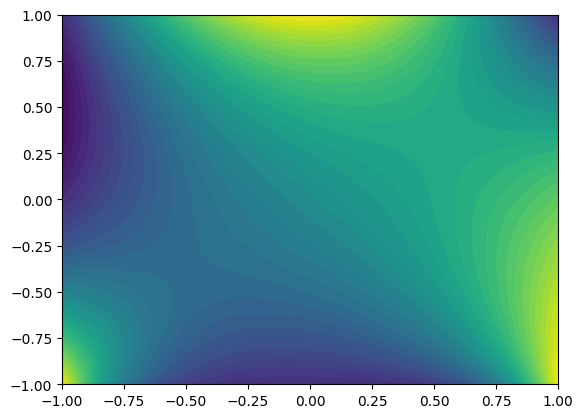

In [14]:
plt.contourf(xv ,yv , potential , 40)

Lets consider the case when we have a constant potential of 1 V along the bounderies.

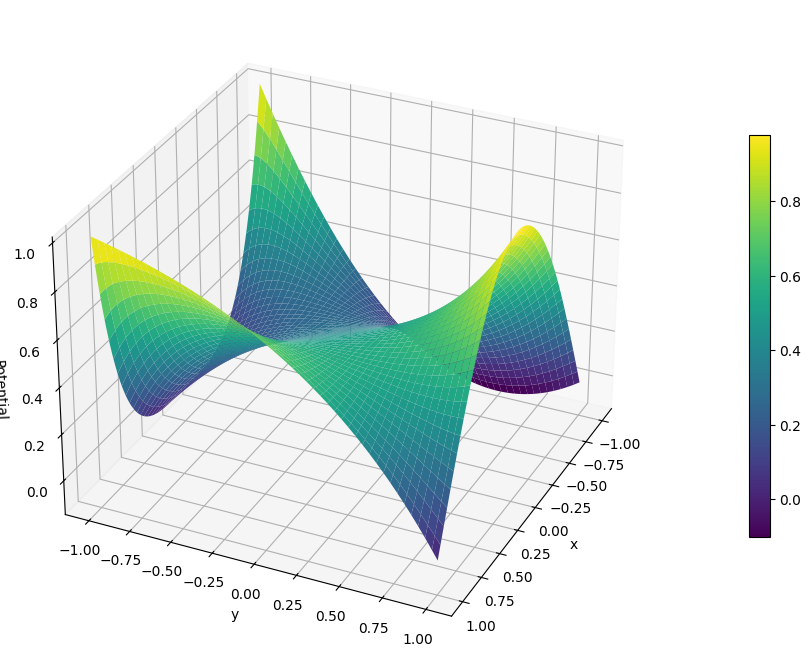

In [15]:
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(projection='3d')

surf = ax.plot_surface(
    xv, yv, potential,
    cmap='viridis',
    linewidth=0,
    antialiased=True
)

fig.colorbar(surf, ax=ax, shrink=0.6, pad=0.1)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Potential')

ax.view_init(elev=30, azim=25)  # good viewing angle

plt.tight_layout()
plt.savefig("potential.png")
plt.show()


In [16]:
#B.C.
upper_y = 0
lower_y = 1
upper_x = 0
lower_x = 1
# lower_x

In [17]:
potential[:,-1] = upper_x
potential[:, 0] = lower_x
potential[-1,:] = upper_y
potential[0 ,:] = lower_y

In [18]:
potential

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 0.96499999, 0.94025014, ..., 0.94883447, 0.9737595 ,
        0.        ],
       [1.        , 0.95624948, 0.93260063, ..., 0.94975359, 0.97374259,
        0.        ],
       ...,
       [1.        , 0.00396618, 0.0144995 , ..., 0.03536018, 0.02534733,
        0.        ],
       [1.        , 0.00722474, 0.01774807, ..., 0.02819283, 0.01793926,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [19]:
compute_potential(potential , n_iter = 10000)

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 9.99956133e-01, 9.99912276e-01, ...,
        6.97643988e-01, 4.99995632e-01, 0.00000000e+00],
       [1.00000000e+00, 9.99912276e-01, 9.99824570e-01, ...,
        4.99982529e-01, 3.02338540e-01, 0.00000000e+00],
       ...,
       [1.00000000e+00, 6.97641505e-01, 4.99977564e-01, ...,
        1.31924630e-04, 6.59623716e-05, 0.00000000e+00],
       [1.00000000e+00, 4.99994390e-01, 3.02336058e-01, ...,
        6.59622594e-05, 3.29811578e-05, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

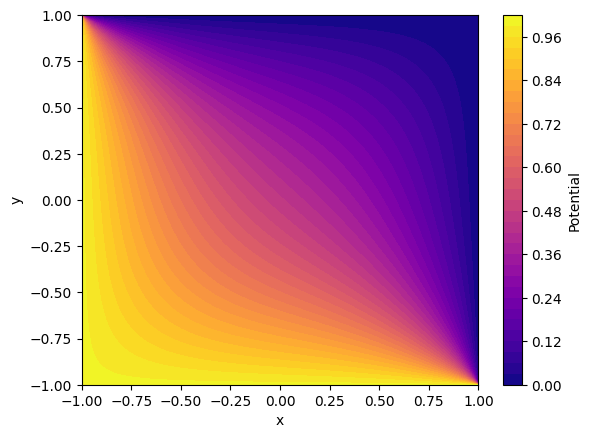

In [20]:
plt.contourf(xv, yv, potential, levels=35, cmap="plasma")
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar(label="Potential")
# textstr = (
#     "Boundary Conditions\n"
#     "Left (x = 0):  V = 0\n"
#     "Right (x = 1): V = 1V\n"
#     "Bottom (y = 0): V = 1V\n"
#     "Top (y = 1):  V = 8V"
# )

# plt.text(
#     0.50, 0.50, textstr,
#     transform=plt.gca().transAxes,
#     fontsize=5,
#     verticalalignment='top',
#     bbox=dict(boxstyle="round", facecolor="white", alpha=0.85)
# )
# plt.savefig("Potential_1.png")

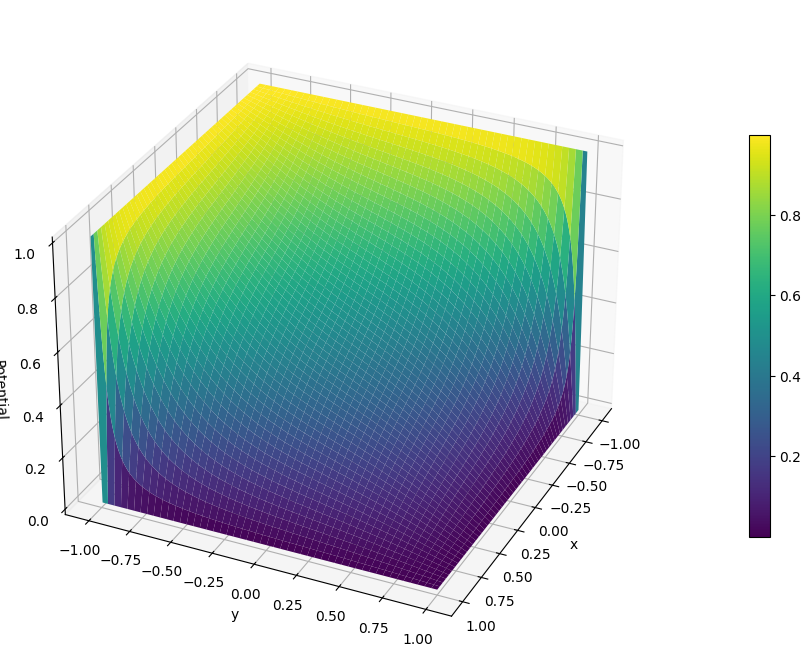

In [21]:
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(projection='3d')

surf = ax.plot_surface(
    xv, yv, potential,
    cmap='viridis',
    linewidth=0,
    antialiased=True
)

fig.colorbar(surf, ax=ax, shrink=0.6, pad=0.1)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Potential')

ax.view_init(elev=30, azim=25)  # good viewing angle

plt.tight_layout()
plt.show()
